# Day 4

## part 1

- Find all the `XMAS`es in the grid. They can be:
    - horizontal
    - vertical
    - diagonal
    - backwards

In [105]:
import logging

from matplotlib import pyplot as plt

from advent_of_code_utils.advent_of_code_utils import (
    parse_from_file, ParseConfig as PC, markdown, plot_grid
)

log = logging.getLogger('day 4')
logging.basicConfig(level=logging.INFO)

In [106]:
with open('day_4_example.txt') as file:
    example = [line.strip() for line in file.readlines()]

for line in example:
    print(line)

MMMSXXMASM
MSAMXMSMSA
AMXSXMAAMM
MSAMASMSMX
XMASAMXAMM
XXAMMXXAMA
SMSMSASXSS
SAXAMASAAA
MAMMMXMMMM
MXMXAXMASX


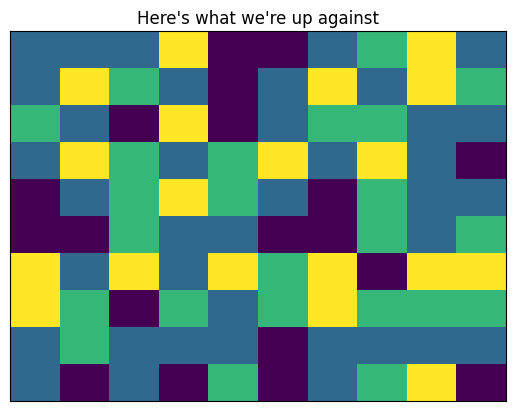

In [112]:
lut = {
    '.': 10, 'X': 11, 'M': 12, 'A': 13, 'S': 14
}

def create_plot(puzzle_input: list[str], title: str):
    """encodes chars to create visual plot"""

    plottable = [[lut[c] for c in line] for line in puzzle_input]

    fig, ax = plt.subplots()
    plot_grid(plottable, ax)

    ax.set_title(title)

create_plot(example, 'Here\'s what we\'re up against')

INFO:day 4:XMAS found at (0, 4) going SE
INFO:day 4:XMAS found at (0, 5) going E
INFO:day 4:XMAS found at (1, 4) going W
INFO:day 4:XMAS found at (3, 9) going S
INFO:day 4:XMAS found at (3, 9) going SW
INFO:day 4:XMAS found at (4, 0) going E
INFO:day 4:XMAS found at (4, 6) going W
INFO:day 4:XMAS found at (4, 6) going N
INFO:day 4:XMAS found at (5, 0) going NE
INFO:day 4:XMAS found at (5, 6) going NW
INFO:day 4:XMAS found at (9, 1) going NE
INFO:day 4:XMAS found at (9, 3) going NW
INFO:day 4:XMAS found at (9, 3) going NE
INFO:day 4:XMAS found at (9, 5) going E
INFO:day 4:XMAS found at (9, 5) going NW
INFO:day 4:XMAS found at (9, 5) going NE
INFO:day 4:XMAS found at (9, 9) going NW
INFO:day 4:XMAS found at (9, 9) going N
INFO:day 4:found 18 XMAS's


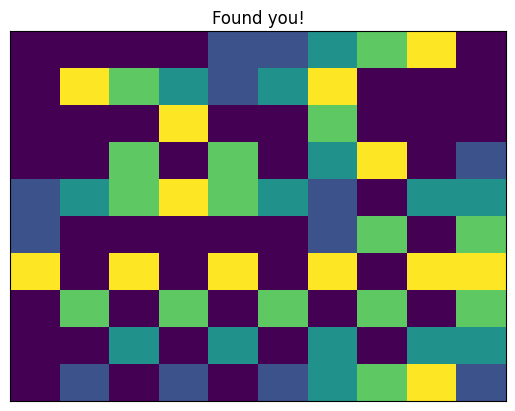

In [113]:
# something for later!
offsets = {
    'E': (0, 1),
    'SE': (1, 1),
    'S': (1, 0),
    'SW': (1, -1),
    'W': (0, -1),
    'NW': (-1, -1),
    'N': (-1, 0),
    'NE': (-1, 1),
}

# anyway! let's see if we can get the example number (18) before continuing
def count_xmas(puzzle_input: list[str]) -> int:
    """returns the number of 'XMAS'es in the puzzle input"""
    # 1. find Xs
    # 2. check all directions for XMAS
    # 3. ...
    # 4. profit!

    results = []
    for line_index, line in enumerate(puzzle_input):
        for char_index, char in enumerate(line):
            if not char == 'X':
                continue
            log.debug(f'found X at ({line_index}, {char_index})')
            for direction in offsets:
                if check_direction(
                    puzzle_input, line_index, char_index, direction
                ):
                    results.append(((line_index, char_index), direction))
                    log.info(
                        f'XMAS found at ({line_index}, {char_index}) '
                        f'going {direction}')

    log.info(f'found {len(results)} XMAS\'s')
    return results

def check_direction(
        puzzle_input: list[str], line: int, char: int, direction: str) -> bool:
    """returns whether there's an XMAS in that direction from that location"""
    log.debug(f'testing {direction}')
    line_index, char_index = line, char
    line_offset, char_offset = offsets[direction]
    result = ''
    check = 'XMAS'
    for _ in check:
        # bounds checks
        if not 0 <= line_index < len(puzzle_input):
            break
        if not 0 <= char_index < len(puzzle_input[0]):
            break
        result += puzzle_input[line_index][char_index]
        line_index += line_offset
        char_index += char_offset
    log.debug(f'{result=}')
    return result == check


def create_result_plot(
        puzzle_input: list[str], results: list[tuple], title: str) -> None:
    """shows us the results of a solved xmas-word"""
    solved = [['.' for char in line] for line in puzzle_input]
    for start, direction in results:
        line_index, char_index = start
        line_offset, char_offset = offsets[direction]
        for _ in 'XMAS':
            solved[line_index][char_index] = \
                puzzle_input[line_index][char_index]
            line_index += line_offset
            char_index += char_offset
    create_plot(solved, title)

log.setLevel(logging.INFO)
example_results = count_xmas(example)
create_result_plot(example, example_results, 'Found you!')

In [114]:
# ok that works let's solve!
with open('day_4.txt') as file:
    puzzle_input = [line.strip() for line in file.readlines()]

log.setLevel(logging.WARNING)
results = count_xmas(puzzle_input)

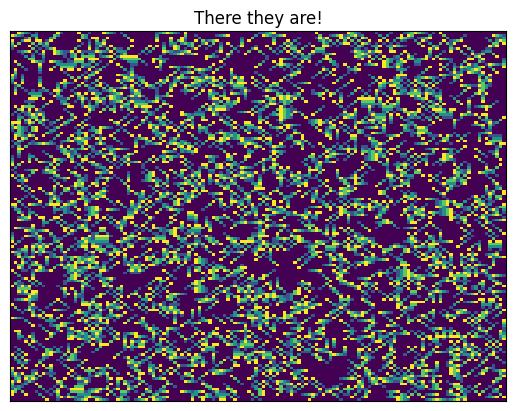

In [115]:
create_result_plot(puzzle_input, results, 'There they are!')

In [116]:
markdown(f'Found {len(results)} XMAS\'s!')

Found 2414 XMAS's!

## part 2

- now we're supposed to find this:
```
M.S
.A.
M.S
```
- looks to still be that any of the 4 rotations are valid

INFO:day 4:Found 9 X-MASes


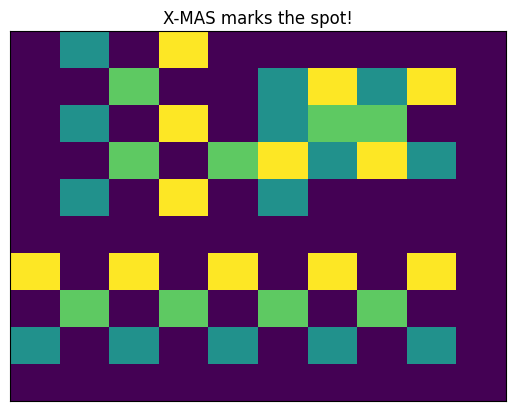

In [121]:
# so instead let's look for "A"s and then look at the diagonals
def count_x_mas(puzzle_input: list[str]) -> tuple[tuple]:
    """finds all the X-MAS's in the puzzle input"""
    results = []
    for line_index, line in enumerate(puzzle_input):
        for char_index, char in enumerate(line):
            if not char == 'A':
                continue
            log.debug(f'found A at ({line_index}, {char_index})')
            if check_mas(puzzle_input, line_index, char_index):
                log.debug(f'X-MAS found!')
                results.append((line_index, char_index))
            else:
                log.debug('No X-MAS here')
    log.info(f'Found {len(results)} X-MASes')
    return results

def check_mas(puzzle_input: list[str], line: int, char: int) -> bool:
    """checks the location specified and returns true if there's an X-MAS"""
    # if we're at the edge of the grid we can't be in an X-MAS
    if not 1 <= line < len(puzzle_input) - 1:
        return False
    if not 1 <= char < len(puzzle_input[0]) - 1:
        return False

    result = ''
    for direction in ['NE', 'SE', 'SW', 'NW']:
        line_offset, char_offset = offsets[direction]
        line_index = line + line_offset
        char_index = char + char_offset
        result += puzzle_input[line_index][char_index]
    log.debug(f'{result=}')
    return result in ['SSMM', 'SMMS', 'MMSS', 'MSSM']

def create_x_mas_plot(
        puzzle_input: list[str], results: list[tuple], title: str) -> None:
    """shows us the results of a solved x-mas-word"""
    solved = [['.' for char in line] for line in puzzle_input]
    for line_index, char_index in results:
        solved[line_index][char_index] = \
            puzzle_input[line_index][char_index]
        for direction in ['NE', 'SE', 'SW', 'NW']:
            line_offset, char_offset = offsets[direction]
            l = line_index + line_offset
            c = char_index + char_offset
            solved[l][c] = puzzle_input[l][c]
    create_plot(solved, title)

log.setLevel(logging.INFO)
example_x_mas = count_x_mas(example)
create_x_mas_plot(example, example_x_mas, 'X-MAS marks the spot!')


INFO:day 4:Found 1871 X-MASes


Found 1871 X-MASes

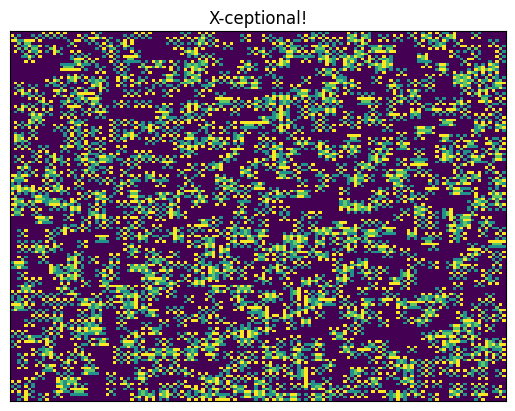

In [124]:
# ok that looks fine - let's run it for real!
x_mas_result = count_x_mas(puzzle_input)
markdown(f'Found {len(x_mas_result)} X-MASes')
create_x_mas_plot(puzzle_input, x_mas_result, 'X-ceptional!')